## Parse Data

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def list_to_plate(lst: pd.Series) -> pd.DataFrame:
    new_index = pd.MultiIndex.from_tuples([(i[0], int(i[1:])) for i in lst.index])
    plate =  pd.Series(lst.values, index=new_index).unstack()
    return plate

def plate_to_list(plate: pd.DataFrame) -> pd.Series:
    s = plate.stack()
    s.index = [f'{row}{col}' for row, col in s.index]
    return s

def set_plate_axes(df: pd.DataFrame) -> pd.DataFrame:
    """ Given a dataframe representing a multiwell plate, set axes to be proper plate axes. """

    df.columns = range(1, len(df.columns)+1)
    df.index = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P'][:len(df.index)]
    return df

def bars(df, **kwargs):
    ax = sns.barplot(data=df,alpha=0.8, **kwargs)
    ax = sns.stripplot(data=df, ax=ax, size=6, dodge=True, legend=False,  edgecolor='black', linewidth=1, **kwargs)
    if 'hue' in kwargs.keys():
      plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    return ax


In [7]:
import pandas as pd
from pathlib import Path


cts = pd.read_csv('iDEC_Phage_propagation_analysis.txt', sep='\t', header=1)[['Pos', 'Cp']]
cts = list_to_plate(cts.set_index('Pos').Cp)
layout_plate1 = pd.read_excel('layout_plate_alternative_1.xlsx', header=None)
layout_plate2 = pd.read_excel('layout_plate_alternative_2.xlsx', header=None)




In [8]:
cts

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
A,15.58,13.9,14.25,NaN,24.08,23.73,23.69,NaN,NaN,NaN,...,30.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B,13.45,14.69,13.78,NaN,24.93,23.05,23.48,NaN,7.21,NaN,...,30.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C,13.33,15.06,14.7,NaN,24.16,24.03,24.28,NaN,6,NaN,...,30.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E,16.2,16.02,17,NaN,26.33,26.23,26.24,NaN,x,NaN,...,31.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F,17.8,18.54,17.48,NaN,26.44,26.87,26.51,NaN,NaN,NaN,...,31.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G,17.12,17.67,18.58,NaN,26.13,26.5,26.65,NaN,NaN,NaN,...,30.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I,20.19,20.92,20.93,NaN,24.54,24.69,24.48,NaN,NaN,24.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
J,19.93,19.56,20.25,NaN,25.8,25.95,26.28,NaN,25.89,25.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
cts_plate1 = plate_to_list(set_plate_axes(cts.iloc[:8, :12])).reset_index().rename(columns={0: 'cp', 'index': 'well'})
cts_plate1['plate'] = 'plate1'
cts_plate2 = plate_to_list(set_plate_axes(cts.iloc[8:, :12])).reset_index().rename(columns={0: 'cp', 'index': 'well'})
cts_plate2['plate'] = 'plate2'

cts_all = pd.concat([cts_plate1, cts_plate2])
cts_all

,well,cp,plate
0,A1,15.58,plate1
1,A2,13.9,plate1
2,A3,14.25,plate1
3,A5,24.08,plate1
4,A6,23.73,plate1
...,...,...,...
20,C5,24.45,plate2
21,C6,25.74,plate2
22,C7,24.56,plate2
23,C10,26.53,plate2


In [10]:
list_to_plate(cts_plate2.set_index('well').cp)

,1,2,3,5,6,7,9,10,11
A,20.19,20.92,20.93,24.54,24.69,24.48,NaN,24.71,27.45
B,19.93,19.56,20.25,25.8,25.95,26.28,25.89,25.42,25.14
C,18.83,19.85,19.83,24.45,25.74,24.56,NaN,26.53,23.9


In [11]:
def parse_plate(df, num_cols):
  pass

def parse_layout(layout: pd.DataFrame):
  idx = 0
  plates = []
  while idx < len(layout.index)-9:
    if layout.iloc[idx, 0] is not None:
      plate = set_plate_axes(layout.iloc[idx+2:idx+2+8, 1:1+12])
      print(plate)
      plate = plate_to_list(plate)
      plate.name = layout.iloc[idx,  0]
      plates.append(plate)
      idx += 11
    else:
      idx += 1
  return pd.concat(plates, axis=1)

meta_plate1 = parse_layout(layout_plate1).reset_index().rename(columns={'index': 'well'})
meta_plate1['plate'] = 'plate1'

meta_plate2 = parse_layout(layout_plate2).reset_index().rename(columns={'index': 'well'})
meta_plate2['plate'] = 'plate2'

meta = pd.concat([meta_plate1, meta_plate2]) # this only works becase meta columns are the same, which won't be the case all the time
meta

        1        2        3   4    5    6    7   8      9      10     11  12
A  1076-08  1076-08  1076-08 NaN   LB   LB   LB NaN  S2208  S2208  S2208 NaN
B  1076-08  1076-08  1076-08 NaN   LB   LB   LB NaN  S2208  S2208  S2208 NaN
C  1076-08  1076-08  1076-08 NaN   LB   LB   LB NaN  S2208  S2208  S2208 NaN
D      NaN      NaN      NaN NaN  NaN  NaN  NaN NaN    NaN    NaN    NaN NaN
E  1076-08  1076-08  1076-08 NaN   LB   LB   LB NaN  S2208  S2208  S2208 NaN
F  1076-08  1076-08  1076-08 NaN   LB   LB   LB NaN  S2208  S2208  S2208 NaN
G  1076-08  1076-08  1076-08 NaN   LB   LB   LB NaN  S2208  S2208  S2208 NaN
H      NaN      NaN      NaN NaN  NaN  NaN  NaN NaN    NaN    NaN    NaN NaN
      1      2      3   4      5      6      7   8      9      10     11  12
A  SIAH1  SIAH1  SIAH1 NaN  SIAH1  SIAH1  SIAH1 NaN  SIAH1  SIAH1  SIAH1 NaN
B  SIAH1  SIAH1  SIAH1 NaN  SIAH1  SIAH1  SIAH1 NaN  SIAH1  SIAH1  SIAH1 NaN
C  SIAH1  SIAH1  SIAH1 NaN  SIAH1  SIAH1  SIAH1 NaN  SIAH1  SIAH1  SIAH1 NaN

,well,strain,Phage,plate
0,A1,1076-08,SIAH1,plate1
1,A2,1076-08,SIAH1,plate1
2,A3,1076-08,SIAH1,plate1
3,A5,LB,SIAH1,plate1
4,A6,LB,SIAH1,plate1
...,...,...,...,...
22,C6,LB,P227,plate2
23,C7,LB,P227,plate2
24,C9,1076-08,NaN,plate2
25,C10,1076-08,NaN,plate2


In [12]:
df = pd.merge(cts_all, meta, on=['well', 'plate'])
df.cp =  pd.to_numeric(df['cp'], errors='coerce').astype('float')
df

,well,cp,plate,strain,Phage
0,A1,15.58,plate1,1076-08,SIAH1
1,A2,13.90,plate1,1076-08,SIAH1
2,A3,14.25,plate1,1076-08,SIAH1
3,A5,24.08,plate1,LB,SIAH1
4,A6,23.73,plate1,LB,SIAH1
...,...,...,...,...,...
62,C5,24.45,plate2,LB,P227
63,C6,25.74,plate2,LB,P227
64,C7,24.56,plate2,LB,P227
65,C10,26.53,plate2,1076-08,NaN


## Compute Propagation

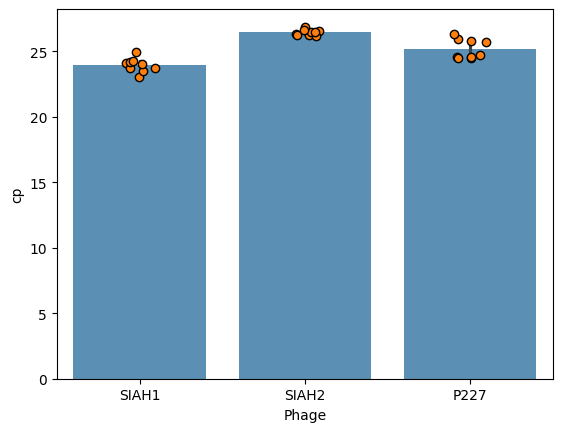

In [13]:
import seaborn as sns

_ = bars(df[df.strain == 'LB'], x='Phage', y='cp')

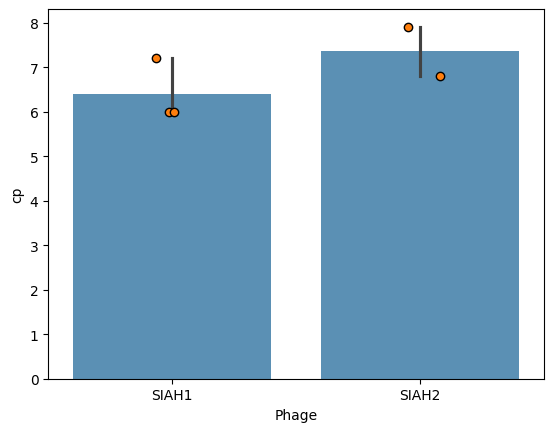

In [14]:
_ = bars(df[df.strain == 'S2208'], x='Phage', y='cp')

In [15]:
df['cp_init'] = pd.NA
for phage in df.Phage.unique():
  df.loc[df.Phage == phage, 'cp_init'] = df[(df.Phage == phage) & (df.strain == 'LB')].cp.mean()

df['fc_log2'] = df.cp_init - df.cp
df['fc'] = 2 ** df.fc_log2
df

,well,cp,plate,strain,Phage,cp_init,fc_log2,fc
0,A1,15.58,plate1,1076-08,SIAH1,23.936667,8.356667,327.798778
1,A2,13.90,plate1,1076-08,SIAH1,23.936667,10.036667,1050.358908
2,A3,14.25,plate1,1076-08,SIAH1,23.936667,9.686667,824.094897
3,A5,24.08,plate1,LB,SIAH1,23.936667,-0.143333,0.905425
4,A6,23.73,plate1,LB,SIAH1,23.936667,0.206667,1.154019
...,...,...,...,...,...,...,...,...
62,C5,24.45,plate2,LB,P227,25.165556,0.715556,1.642115
63,C6,25.74,plate2,LB,P227,25.165556,-0.574444,0.671545
64,C7,24.56,plate2,LB,P227,25.165556,0.605556,1.521565
65,C10,26.53,plate2,1076-08,NaN,<NA>,<NA>,<NA>


In [16]:
df.strain.unique()

array(['1076-08', 'LB', 'S2208'], dtype=object)

## Results


/var/folders/5b/cl1vpvwx7z12hpb0ntpgryk40000gp/T/ipykernel_91922/3578311833.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Phage = d.Phage.map(lambda x : {'SIAH1': 'SIAH1-SP', 'SIAH2': 'SIAH2-SP', 'P227': 'UN-SP'}.get(x, x))


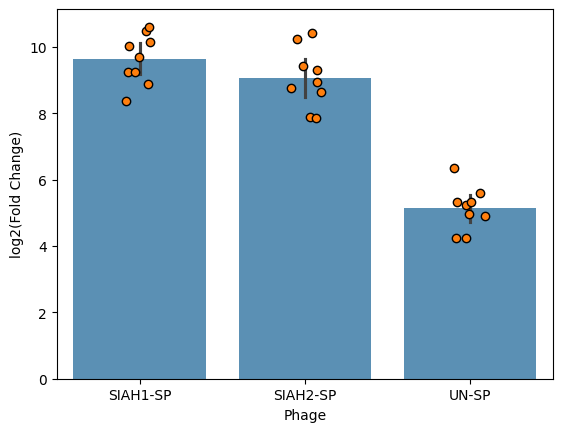

In [19]:
d = df[(df.strain == '1076-08')]
d.Phage = d.Phage.map(lambda x : {'SIAH1': 'SIAH1-SP', 'SIAH2': 'SIAH2-SP', 'P227': 'UN-SP'}.get(x, x))
ax = bars(d, x='Phage', y='fc_log2')
ax.set_ylabel('log2(Fold Change)')
plt.savefig('../figs/20240727_fig1A.pdf', format='pdf')